<a href="https://colab.research.google.com/github/Offcute/CF-DashApp/blob/main/Test_Survey_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Survey with ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

# List files to make sure we're in the expected directory.
# Your output will look different, showing your own Drive files here.


!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
 AssEco.gdoc
'Colab Notebooks'
 ISproject_documents
'ITM6304 Quiz and Exercise'
 Khemmanat_Applying_Resume.pdf
'New Headphone Production Survey Complete.csv'
'New Headphone Production Survey Complete.gsheet'
'New Headphone Production Survey for ML.csv'
'New Headphone Production Survey (Responses).gsheet'
 __pycache__
'Report and video adjusting by MATLAB'
 RuleBased_Classification.py
 Survey_MLclassification.py
'Total responses categorized characteristic survey.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)  # or 199
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)

df = pd.read_csv("New Headphone Production Survey for ML.csv")


In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# df3 = pd.concat([df]*20, ignore_index=True)

# train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]


In [ ]:
#importanct features

df3 = pd.concat([df]*20, ignore_index=True)

train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

X_train = train_df.drop(labels=['Gender','Age','Status','Education','Occupation','HpAnswer'],axis=1)
Y_train = train_df["HpAnswer"]
X_test  = test_df.drop(labels=['Gender','Age','Status','Education','Occupation','HpAnswer'],axis=1)
Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
Y3           = random_forest.predict_proba(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_prediction))
#print(acc_random_forest)
#print(Y_prediction,Y3)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances_cut = importances.loc[importances['feature']!=['Gender','Age','Status','Education','Occupation']]
#importances_qicks = importances.drop(labels=['Gender','Age','Status','Education','Occupation'],axis=0)
#importances_qicks = importances_qicks.sort_values(by=['importance'])
importances


,importance
feature,
FactorHps,0.135
ActivityHps,0.099
PriceHps,0.090
InnovationHps,0.076
PlaceHps,0.055
InfoHps_PR,0.055
InfoHps_Store,0.044
InfoHps_Google,0.044
InfoHps_online,0.042


In [ ]:

# X_train = train_df[['Gender','Age','Status','Education','Occupation']]
# Y_train = train_df["HpAnswer"]
# X_test = test_df[['Gender','Age','Status','Education','Occupation']]
# Y_test  = test_df["HpAnswer"]
#      colname=['Gender','Age','Status','Education','Occupation','HpAnswer','NumberHps', 'ActivityHps', 'TimeHps','PriceHps','PlaceHps','FactorHps','HealthHps','InnovationHps',\
#              "PB_nosound","PB_disconnect","PB_badsound","PB_unfit","PB_oneear","PB_toosd","PB_audiocut","PB_battery",\
#              "PB_unplug","InfoHps_online","InfoHps_Social","InfoHps_Google","InfoHps_Store","InfoHps_PR","InfoHps_Ads"]
colname=['ActivityHps','PriceHps','PlaceHps','FactorHps','InnovationHps',\
    "InfoHps_online","InfoHps_Store","InfoHps_PR"]
X_train = train_df[colname]
Y_train = train_df["HpAnswer"]
X_test  = test_df[colname]
Y_test  = test_df["HpAnswer"]

# X_train = train_df[['FactorHps','PriceHps','ActivityHps','InnovationHps','PlaceHps',"InfoHps_PR","InfoHps_online","InfoHps_Store"]]
# Y_train = train_df["HpAnswer"]
# X_test = test_df[['FactorHps','PriceHps','ActivityHps','InnovationHps','PlaceHps',"InfoHps_PR","InfoHps_online","InfoHps_Store"]]
# Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop(['Gender','Age','Status','Education','Occupation','HpAnswer'], axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop(['Gender','Age','Status','Education','Occupation','HpAnswer'], axis=1)
# Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
Y3           = random_forest.predict_proba(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
Y3     = logreg.predict_proba(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_pred))
#print(acc_log)
#print(Y_pred,Y3)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
Y3           = decision_tree.predict_proba(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_pred))
#print(acc_log)
#print(Y_pred,Y3)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.61,KNN
98.61,Random Forest
98.61,Decision Tree
71.83,Naive Bayes
65.08,Logistic Regression
64.29,Support Vector Machines
53.87,Stochastic Gradient Decent
45.34,Perceptron


<Axes: xlabel='feature'>

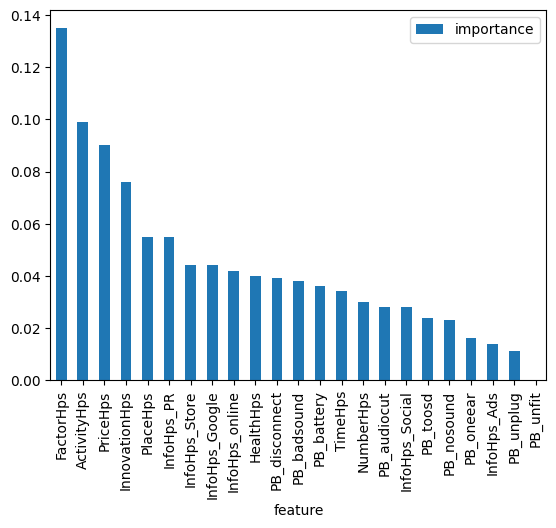

In [ ]:
importances.plot.bar()


In [ ]:
!pip install dash

from dash import dcc

def feature_importance():
    return importances
colnames=['FactorHps','ActivityHps','PriceHps','InnovationHps']
xts = pd.DataFrame(np.array([[1,1,1,1]]),columns=colnames)
#xts = np.unique(['NumberHps', 'NumberHps', 'TimeHps'])
xts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,FactorHps,ActivityHps,PriceHps,InnovationHps
0,1,1,1,1


In [ ]:
def predict_input(que1,que2,que3,que4,ans1,ans2,ans3,ans4):
    X1=({que1: [ans1],
        que2: [ans2],
        que3: [ans3],
        que4: [ans4]})

    #X1 = ({'Gender':[0], 'Age': [2], 'Status':[0], 'Education':[1],'Occupation': [2]})

    dfs = pd.DataFrame(X1)

    return dfs

In [ ]:
def MLdecision_tree(xtest):
    X_train = train_df[xtest.columns.values]
    Y_train = train_df["HpAnswer"]
    random_forest = RandomForestClassifier(n_estimators=100)

    X_test  = test_df[xtest.columns.values]
    Y_test  = test_df["HpAnswer"]
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    Y3           = random_forest.predict_proba(X_test)

    Y_train = train_df["HpAnswer"]
    random_forest.fit(X_train, Y_train)
    Y_pred_hp = random_forest.predict(xtest)
    Y3           = random_forest.predict_proba(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_hp:",acc_random_forest)

    Y_train = train_df["Gender"]
    random_forest.fit(X_train, Y_train)
    Y_pred_gender = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_gender:",acc_random_forest)

    Y_train = train_df["Age"]
    random_forest.fit(X_train, Y_train)
    Y_pred_age = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_age:",acc_random_forest)

    Y_train = train_df["Status"]
    random_forest.fit(X_train, Y_train)
    Y_pred_status = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_status:",acc_random_forest)

    Y_train = train_df["Education"]
    random_forest.fit(X_train, Y_train)
    Y_pred_edu = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_edu:",acc_random_forest)

    Y_train = train_df["Occupation"]
    random_forest.fit(X_train, Y_train)
    Y_pred_occ = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_occ:",acc_random_forest)

    if Y_pred_hp[0] == 1 : charac_hp = "HP1"
    if Y_pred_hp[0] == 2 : charac_hp = "HP2"
    if Y_pred_hp[0] == 3 : charac_hp = "HP3"

    if Y_pred_gender[0] == 0 : charac_gender = "female"
    if Y_pred_gender[0] == 1 : charac_gender = "male"

    if Y_pred_age[0] == 1 : charac_age = "20-27"
    if Y_pred_age[0] == 2 : charac_age = "28-35"
    if Y_pred_age[0] == 3 : charac_age = "36-45"

    if Y_pred_status[0] == 0 : charac_status = "single"
    if Y_pred_status[0] == 1 : charac_status = "married"

    if Y_pred_edu[0] == 1 : charac_edu = "graduate"
    if Y_pred_edu[0] == 2 : charac_edu = "undergraduate"
    if Y_pred_edu[0] == 3 : charac_edu = "high school"
    if Y_pred_edu[0] == 4 : charac_edu = "unspecified education"

    if Y_pred_occ[0] == 1 : charac_occ = "student"
    if Y_pred_occ[0] == 2 : charac_occ = "employee"
    if Y_pred_occ[0] == 3 : charac_occ = "business owner"
    if Y_pred_occ[0] == 4 : charac_occ = "unspecified occupation"

    #acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
    print(classification_report(Y_test, Y_pred))
    #print("acc_decision_tree:",label,acc_decision_tree)
    #print(Y_pred,Y3)
    return charac_hp,charac_gender,charac_age,charac_status,charac_edu,charac_occ,Y_pred_hp[0],Y_pred_gender[0],\
          Y_pred_age[0],Y_pred_status[0],Y_pred_occ[0],Y_pred_edu[0],Y3

In [ ]:
MLdecision_tree(xts)

acc_random_forest_hp: 92.96
acc_random_forest_gender: 96.33
acc_random_forest_age: 94.74
acc_random_forest_status: 97.52
acc_random_forest_edu: 90.08
acc_random_forest_occ: 94.35
              precision    recall  f1-score   support

           1       1.00      0.66      0.79        58
           2       0.92      0.96      0.94       245
           3       0.93      1.00      0.97       129

    accuracy                           0.93       432
   macro avg       0.95      0.87      0.90       432
weighted avg       0.94      0.93      0.93       432



('HP2',
 'female',
 '36-45',
 'married',
 'high school',
 'unspecified occupation',
 2,
 0,
 3,
 1,
 4,
 3,
 array([[0.08, 0.91, 0.01]]))

In [ ]:
dfs = predict_input('FactorHps','ActivityHps','PriceHps','InnovationHps',2,1,1,2)
dfs.columns.values

array(['FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps'],
      dtype=object)

In [ ]:
# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df[["HpAnswer"]]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df[["HpAnswer"]]
xt = pd.DataFrame([{'FactorHps':1,'PriceHps':2,'ActivityHps':3}])
xt.columns.values

array(['FactorHps', 'PriceHps', 'ActivityHps'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_onehot_test.shape  # (n_samples, n_classes)

#label_binarizer.transform([1])

(432, 3)

In [ ]:
# class_of_interest = 1
# class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
# class_id

In [ ]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
# df3 = pd.concat([df]*20, ignore_index=True)

# train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)
# features = ['FactorHps','PriceHps','ActivityHps']
# X_train = train_df[features]
# Y_train = train_df["HpAnswer"]
# X_test  = test_df[features]
# Y_test  = test_df["HpAnswer"]

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)

def getROCfigure(htype,features,label,tname):
    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    if(label == "HpAnswer") or (label == "Age") or (label == "Education") or (label == "Occupation"):

        label_binarizer = LabelBinarizer().fit(Y_train)
        y_onehot_test = label_binarizer.transform(Y_test)
        y_onehot_test.shape  # (n_samples, n_classes)

        class_of_interest = int(htype)
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve (AUC={auc(fpr, tpr):.4f}){tname}</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )

    if (label == "Gender"):
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(np.array(Y_test), y_score)
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve (AUC={auc(fpr, tpr):.4f}) of Female 0 - Male 1</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )
    if (label == "Status"):
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(np.array(Y_test), y_score)
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve(AUC={auc(fpr, tpr):.3f})Single 0-Married 1</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(width=270,height=270, font=dict(size=7),margin=dict(l=10, r=10, t=30, b=10))
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig

In [ ]:
getROCfigure(1,['FactorHps','PriceHps','ActivityHps'],'Status',0)


In [ ]:
getROCfigure(1,['FactorHps','PriceHps','ActivityHps'],'HpAnswer','HP1')


In [ ]:
getROCfigure(2,['FactorHps','PriceHps','ActivityHps'],'HpAnswer','HP2')


In [ ]:

getROCfigure(3,xt.columns.values,'HpAnswer','HP3')


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

def getROCfigure2(features,label):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)

    y_scores = decision_tree.predict_proba(X_train)
    # One hot encode the labels in order to plot them
    y_onehot = pd.get_dummies(Y_train, columns=decision_tree.classes_)
    # Create an empty figure, and iteratively add new lines
    # every time we compute a new class
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)

        if(label == "HpAnswer"):
            if y_onehot.columns[i] == 1 : attrcol = "HP1"
            if y_onehot.columns[i] == 2 : attrcol = "HP2"
            if y_onehot.columns[i] == 3 : attrcol = "HP3"
        elif(label == "Gender"):
            if y_onehot.columns[i] == 0 : attrcol = "F"
            if y_onehot.columns[i] == 1 : attrcol = "M"
        elif(label == "Age"):
            if y_onehot.columns[i] == 1 : attrcol = "20-27"
            if y_onehot.columns[i] == 2 : attrcol = "28-35"
            if y_onehot.columns[i] == 3 : attrcol = "36-45"
        elif(label == "Status"):
            if y_onehot.columns[i] == 0 : attrcol = "S"
            if y_onehot.columns[i] == 1 : attrcol = "M"
        elif(label == "Education"):
            if y_onehot.columns[i] == 1 : attrcol = "G"
            if y_onehot.columns[i] == 2 : attrcol = "U"
            if y_onehot.columns[i] == 3 : attrcol = "H"
            if y_onehot.columns[i] == 4 : attrcol = "O"
        elif(label == "Occupation"):
            if y_onehot.columns[i] == 1 : attrcol = "S"
            if y_onehot.columns[i] == 2 : attrcol = "E"
            if y_onehot.columns[i] == 3 : attrcol = "B"
            if y_onehot.columns[i] == 4 : attrcol = "O"

        name = f"{attrcol}(AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))
    if(label == "HpAnswer"):
        labels="Headphone Type"
    else:
        labels= label
    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        title=f'ROC Curve of {labels}',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=500,height=450,
        font=dict(size=12),margin=dict(l=10, r=10, t=50, b=10))
    return fig

def getROCfigure3(features,label,tname):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    # # Fit the model
    # model = LogisticRegression(max_iter=200)
    # model.fit(X, y)
    y_scores = decision_tree.predict_proba(X_test)
    # One hot encode the labels in order to plot them
    y_onehot = pd.get_dummies(Y_test, columns=decision_tree.classes_)

    # Create an empty figure, and iteratively add new lines
    # every time we compute a new class
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)

        name = f"{y_onehot.columns[i]}(AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        title=f'ROC Curve of {tname}',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        font=dict(size=12),margin=dict(l=10, r=10, t=50, b=10))
    return fig


In [ ]:
colname

['ActivityHps',
 'PriceHps',
 'PlaceHps',
 'FactorHps',
 'InnovationHps',
 'InfoHps_online',
 'InfoHps_Store',
 'InfoHps_PR']

In [ ]:
getROCfigure2(colname,'HpAnswer')


In [ ]:
colnames

['FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps']

In [ ]:
getROCfigure2(colnames,'HpAnswer')


In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import plotly.express as px

def getConfusionMatrix(features,label):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    cm = confusion_matrix(Y_test,Y_pred,normalize='true')
    cm1 = np.round(cm,2)
    #print(Y_train.value_counts().index.shape[0])
    #list(map(str,Y_train.value_counts().index.sort_values()))
    if(label == "HpAnswer"):
        ac = ['HP1','HP2','HP3']
    elif(label == "Gender"):
        ac = ['F','M']
    elif(label == "Age"):
        ac = ['20-27','28-35', '36-45']
    elif(label == "Status"):
        ac = ['S','M']
    elif(label == "Education"):
        ac = ['G','U','H','O']
    elif(label == "Occupation"):
        if(Y_train.value_counts().index.shape[0]==3):
           ac = ['E','B','O']
        else:
           ac = ['S','E','B','O']

    fig = px.imshow(cm1,
                    labels=dict(x="Predicted label", y="True label"),
                    color_continuous_scale='blues',
                    aspect="auto",
                    x = ac,
                    y = ac,
                  # title='Normalized confusion matrix',
                    text_auto=True)
    fig.update_xaxes(side="bottom")
    fig.update_layout(width=300,height=300, font=dict(size=12),margin=dict(l=10, r=10, t=10, b=10))
    fig.update_coloraxes(showscale=False)

    return fig

In [ ]:
getConfusionMatrix(colnames,'HpAnswer')

In [ ]:
!pip install dalex

import dalex as dx


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

df3 = pd.concat([df]*20, ignore_index=True)

train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

X = train_df[['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps']]
y = train_df["HealthHps"]

numerical_features = ['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps']
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# categorical_features = ['gender', 'class', 'embarked']
# categorical_transformer = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('onehot', OneHotEncoder(handle_unknown='ignore'))
#     ]
# )

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
       # ('cat', categorical_transformer, categorical_features)
    ]
)

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046022 sha256=ddb9de3f21ac5a5a25121d7c04a693884b0282f71efb7b61255df3d1d532be64
  Stored in directory: /root/.cache/pip/wheels/3e/dc/80/530757389f7587f2b1cd02e5a0a11dd986b232b06eacebcf8d
Successfully built dalex


In [ ]:
clf.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Age', 'Status',
                                                   'Education', 'Occupation',
                                                   'FactorHps', 'ActivityHps',
                                                   'PriceHps'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500,
                               random_state=0))])

In [ ]:
exp = dx.Explainer(clf, X, y)


Preparation of a new explainer is initiated

  -> data              : 1008 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1008 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f4eafbb0e50> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 4.02e-08, mean = 0.614, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.323, mean = 0.00474, max = 0.677
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# ['Gender','Age','Status','Education','Occupation','HpAnswer','NumberHps', 'ActivityHps', 'TimeHps',\
#                       'PriceHps','PlaceHps','FactorHps','HealthHps','InnovationHps',"PB_nosound","PB_disconnect","PB_badsound",\
#                       "PB_unfit","PB_oneear","PB_toosd","PB_audiocut","PB_battery","PB_unplug","InfoHps_online",\
#                       "InfoHps_Social","InfoHps_Google","InfoHps_Store","InfoHps_PR","InfoHps_Ads"]

me = pd.DataFrame({'Gender': [0],
                   'Age': [2],
                   'Status': [1],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[1],
                   'ActivityHps':[2],
                   'PriceHps':[1]},
                    index = ['Me'])

In [ ]:
exp.predict(me)


array([6.92954416e-05])

In [ ]:
bd_me = exp.predict_parts(me, type='break_down', label=me.index[0])
# bd_interactions_me = exp.predict_parts(me, type='break_down_interactions', label="me+")

# sh_me = exp.predict_parts(me, type='shap', B = 10, label=me.index[0])

In [ ]:
bd_me.result


,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.614307,0.614307,1.0,9,Me
1,PriceHps,1.0,PriceHps = 1.0,0.743928,0.129621,1.0,8,Me
2,Education,2.0,Education = 2.0,0.769384,0.025456,1.0,7,Me
3,Occupation,2.0,Occupation = 2.0,0.885900,0.116516,1.0,6,Me
4,Gender,0.0,Gender = 0.0,0.834517,-0.051383,-1.0,5,Me
5,Age,2.0,Age = 2.0,0.840359,0.005843,1.0,4,Me
6,FactorHps,1.0,FactorHps = 1.0,0.843857,0.003498,1.0,3,Me
7,ActivityHps,2.0,ActivityHps = 2.0,0.768682,-0.075175,-1.0,2,Me
8,Status,1.0,Status = 1.0,0.000069,-0.768613,-1.0,1,Me
9,,,prediction,0.000069,0.000069,1.0,0,Me


In [ ]:
bd_me.plot()


In [ ]:
import dalex as dx

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

X = train_df[['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps']]
y = train_df["HpAnswer"]

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
model.predict_proba(X).shape

(1008, 3)

In [ ]:
# custom (binary) predict function
pf_0 = lambda m, d: m.predict_proba(d)[:, 0]

# custom (binary) target values
y_0 = y == 1

# explainer
exp_0 = dx.Explainer(model, X, y_0, predict_function=pf_0, label="RFClassifier: class 0")

Preparation of a new explainer is initiated

  -> data              : 1008 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1008 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RFClassifier: class 0
  -> predict function  : <function <lambda> at 0x7f4eaeeb68b0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
exp_0.model_parts()


,variable,dropout_loss,label
0,Occupation,0.000000e+00,RFClassifier: class 0
1,Status,0.000000e+00,RFClassifier: class 0
2,_full_model_,0.000000e+00,RFClassifier: class 0
3,Gender,1.110223e-17,RFClassifier: class 0
4,Age,1.337803e-03,RFClassifier: class 0
5,InnovationHps,3.092482e-03,RFClassifier: class 0
6,ActivityHps,1.025452e-02,RFClassifier: class 0
7,FactorHps,4.784980e-02,RFClassifier: class 0
8,PriceHps,6.439125e-02,RFClassifier: class 0
9,Education,6.563460e-02,RFClassifier: class 0


In [ ]:
exp_list = []

for i in range(len(np.unique(y))):
    # add i parameter to `predict_function` just to do it in a loop
    pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
    e = dx.Explainer(
        model, X,
        y == i+1,
        predict_function=pf,
        label=f'RFClassifier: class {i+1}',
        verbose=False
    )
    exp_list += [e]

exp_list

In [ ]:
m_profile_list = [e.model_profile() for e in exp_list]


Calculating ceteris paribus: 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]


In [ ]:
m_profile_list[0].plot(m_profile_list[1:])


In [ ]:
m_parts_list = [e.model_parts() for e in exp_list]
m_parts_list[0].plot(m_parts_list[1:])

In [ ]:
# choose a data point to explain
# observation = X.iloc[[0]]
# observation
observation = pd.DataFrame({'Gender': [1],
                   'Age': [2],
                   'Status': [0],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[3],
                   'ActivityHps':[2],
                   'InnovationHps':[2],
                   'PriceHps':[2]},
                    index = ['Me'])
#p_parts_list = [e.predict_parts(observation) for e in exp_list]
#p_parts_list[0].plot(p_parts_list[1:], min_max=[-0.1, 1.1])

In [ ]:
p_parts_list = [e.predict_parts(observation) for e in exp_list]
#p_parts_list = [e.predict_parts(observation).result for e in exp_list]
p_parts_list[1]

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.590278,0.590278,1.0,8,RFClassifier: class 2
1,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.729246,0.138968,1.0,7,RFClassifier: class 2
2,Education,2.0,Education = 2.0,0.657738,-0.071508,-1.0,6,RFClassifier: class 2
3,ActivityHps,2.0,ActivityHps = 2.0,0.615407,-0.042331,-1.0,5,RFClassifier: class 2
4,InnovationHps,2.0,InnovationHps = 2.0,0.604266,-0.011141,-1.0,4,RFClassifier: class 2
5,Age:Gender,2.0:1.0,Age:Gender = 2.0:1.0,0.599861,-0.004405,-1.0,3,RFClassifier: class 2
6,Occupation,2.0,Occupation = 2.0,0.604573,0.004712,1.0,2,RFClassifier: class 2
7,Status,0.0,Status = 0.0,0.630000,0.025427,1.0,1,RFClassifier: class 2
8,,,prediction,0.630000,0.630000,1.0,0,RFClassifier: class 2


In [ ]:
p_parts_list[0].plot(p_parts_list[1:], min_max=[-0.1, 1.1])


In [ ]:
MLdecision_tree(observation)

acc_random_forest_hp: 100.0
acc_random_forest_gender: 100.0
acc_random_forest_age: 100.0
acc_random_forest_status: 100.0
acc_random_forest_edu: 100.0
acc_random_forest_occ: 100.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       245
           3       1.00      1.00      1.00       129

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



('HP2',
 'male',
 '28-35',
 'single',
 'undergraduate',
 'employee',
 2,
 1,
 2,
 0,
 2,
 2,
 array([[0.22, 0.61, 0.17]]))

In [ ]:
pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.160714,0.160714,1.0,7,RFClassifier: class 1
1,ActivityHps,2.0,ActivityHps = 2.0,0.225347,0.064633,1.0,6,RFClassifier: class 1
2,FactorHps,3.0,FactorHps = 3.0,0.182976,-0.042371,-1.0,5,RFClassifier: class 1
3,PriceHps:Gender,2.0:1.0,PriceHps:Gender = 2.0:1.0,0.107321,-0.075655,-1.0,4,RFClassifier: class 1
4,InnovationHps:Education,2.0:2.0,InnovationHps:Education = 2.0:2.0,0.117440,0.010119,1.0,3,RFClassifier: class 1
5,Occupation:Age,2.0:2.0,Occupation:Age = 2.0:2.0,0.120000,0.002560,1.0,2,RFClassifier: class 1
6,Status,0.0,Status = 0.0,0.120000,0.000000,0.0,1,RFClassifier: class 1
7,,,prediction,0.120000,0.120000,1.0,0,RFClassifier: class 1
0,intercept,,intercept,0.590278,0.590278,1.0,8,RFClassifier: class 2
1,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.729246,0.138968,1.0,7,RFClassifier: class 2


In [ ]:
p_parts_list[1].result

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.590278,0.590278,1.0,8,RFClassifier: class 2
1,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.729246,0.138968,1.0,7,RFClassifier: class 2
2,Education,2.0,Education = 2.0,0.657738,-0.071508,-1.0,6,RFClassifier: class 2
3,ActivityHps,2.0,ActivityHps = 2.0,0.615407,-0.042331,-1.0,5,RFClassifier: class 2
4,InnovationHps,2.0,InnovationHps = 2.0,0.604266,-0.011141,-1.0,4,RFClassifier: class 2
5,Age:Gender,2.0:1.0,Age:Gender = 2.0:1.0,0.599861,-0.004405,-1.0,3,RFClassifier: class 2
6,Occupation,2.0,Occupation = 2.0,0.604573,0.004712,1.0,2,RFClassifier: class 2
7,Status,0.0,Status = 0.0,0.630000,0.025427,1.0,1,RFClassifier: class 2
8,,,prediction,0.630000,0.630000,1.0,0,RFClassifier: class 2


In [ ]:
adata = p_parts_list[2].result

adata['contribution'] = round(adata['contribution'],3)
adata

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.249008,0.249,1.0,7,RFClassifier: class 3
1,Education,2.0,Education = 2.0,0.316756,0.068,1.0,6,RFClassifier: class 3
2,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.270615,-0.046,-1.0,5,RFClassifier: class 3
3,Age,2.0,Age = 2.0,0.255327,-0.015,-1.0,4,RFClassifier: class 3
4,InnovationHps,2.0,InnovationHps = 2.0,0.243958,-0.011,-1.0,3,RFClassifier: class 3
5,Occupation:Gender,2.0:1.0,Occupation:Gender = 2.0:1.0,0.369831,0.126,1.0,2,RFClassifier: class 3
6,ActivityHps:Status,2.0:0.0,ActivityHps:Status = 2.0:0.0,0.250000,-0.120,-1.0,1,RFClassifier: class 3
7,,,prediction,0.250000,0.250,1.0,0,RFClassifier: class 3


In [ ]:
import plotly.express as px

def get_explaination(observation):
    X = train_df[observation.columns.values]
    y = train_df["HpAnswer"]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X, y)
    exp_list = []

    for i in range(len(np.unique(y))):
        # add i parameter to `predict_function` just to do it in a loop
        pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
        e = dx.Explainer(
            model, X,
            y == i,
            predict_function=pf,
            label=f'{i+1}',
            verbose=False
        )
        exp_list += [e]

    p_parts_list = [e.predict_parts(observation) for e in exp_list]
    adata = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata['contribution'] = round(adata['contribution'],3)
    pt = adata.loc[adata['variable']=="prediction"]
    pmax = pt['contribution'].max()
    pt = pt.loc[pt['contribution']==pmax]
    htype = pt['label'].iloc[0]

    adata = adata.loc[adata['label']==htype]
    #print(adata)
    fig = go.Figure()
    bcolors = []
    adata['variable_name'].replace("",'prediction', inplace=True)
    for i in range(len(adata['contribution'])):
        if (adata.iloc[i]['contribution'] < 0):
               bcolors.append("red")
        elif(adata.iloc[i]['contribution'] > 0 and adata.iloc[i]['variable_name']!="prediction" \
             and adata.iloc[i]['variable_name']!="intercept"):
               bcolors.append("green")
        elif(adata.iloc[i]['variable_name']=="prediction"):
               bcolors.append("blue")
        elif(adata.iloc[i]['variable_name']=="intercept"):
               bcolors.append("white")
    fig.add_trace(go.Bar(
        y= adata['variable_name'],
        x=adata['contribution'],
        orientation='h',
        text = adata['contribution'],
        marker=dict(
            color=bcolors,
            #line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
        )
    ))
    fig.update_layout(
        title= f'<b>Explaination: product selection HP{htype}</b>',
        margin=dict(l=0, r=0, t=35, b=10),
        #height=300
    )

    return fig

def get_exresult(observation):

    X = train_df[observation.columns.values]
    y = train_df["HpAnswer"]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X, y)
    exp_list = []

    for i in range(len(np.unique(y))):
        # add i parameter to `predict_function` just to do it in a loop
        pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
        e = dx.Explainer(
            model, X,
            y == i,
            predict_function=pf,
            label=f'{i+1}',
            verbose=False
        )
        exp_list += [e]

    p_parts_list = [e.predict_parts(observation) for e in exp_list]
    adata2 = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata['contribution'] = round(adata['contribution'],3)
    pt = adata.loc[adata['variable']=="prediction"]
    pmax = pt['contribution'].max()
    pt = pt.loc[pt['contribution']==pmax]
    htype = pt['label'].iloc[0]
    adata = adata.loc[adata['label']==htype]

    return htype,adata2

In [ ]:
observation2 = pd.DataFrame({'Gender': [1],
                   'Age': [2],
                   'Status': [0],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[5],
                   'ActivityHps':[2],
                   'InnovationHps':[2],
                   'PriceHps':[2]})

In [ ]:
get_explaination(observation)

In [ ]:
#get_exresult(observation)
get_explaination(observation)

In [ ]:
get_exresult(observation)

('2',
              variable_name variable_value                           variable  \
 0                intercept                                         intercept   
 1              ActivityHps            2.0                  ActivityHps = 2.0   
 2                FactorHps            3.0                    FactorHps = 3.0   
 3          PriceHps:Gender        2.0:1.0          PriceHps:Gender = 2.0:1.0   
 4  InnovationHps:Education        2.0:2.0  InnovationHps:Education = 2.0:2.0   
 5                      Age            2.0                          Age = 2.0   
 6                   Status            0.0                       Status = 0.0   
 7               Occupation            2.0                   Occupation = 2.0   
 8                                                                 prediction   
 0                intercept                                         intercept   
 1       PriceHps:FactorHps        2.0:3.0       PriceHps:FactorHps = 2.0:3.0   
 2              Activi